In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import sys
import os
import json
from pprint import pprint

sys.path.append(os.path.abspath('../'))
from data import Data

path_to_data="/home/akhazi/Dropbox/University College London/MSc/Dissertation/Datasets/data/"
path_to_data_win="C:/Users/Adam Khazi/Dropbox/University College London/MSc/Dissertation/Datasets/data/"

In [14]:
with open(path_to_data_win + "mpd.slice.0-999.json") as f:
    data = json.load(f)

In [16]:
d = Data()
playlistData = d.load(3)

In [17]:
type(playlistData)

list

In [28]:
data['info']

{'generated_on': '2017-12-03 08:41:42.057563',
 'slice': '0-999',
 'version': 'v1'}

## Track Lengths

In [18]:
playlist_dist = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["num_tracks"] not in playlist_dist:
            playlist_dist[playlist["num_tracks"]] = 1
        else:
            playlist_dist[playlist["num_tracks"]]+=1

In [19]:
playlist_tuples = list(playlist_dist.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_tracks=[t[0] for t in playlist_tuples]
playlist_nr_nr_tracks=[t[1] for t in playlist_tuples]

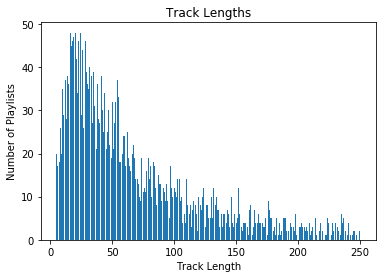

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(playlist_nr_tracks, height=playlist_nr_nr_tracks)
plt.title('Track Lengths')
plt.xlabel('Track Length')
plt.ylabel('Number of Playlists')
plt.show()

## Playlist Edits

In [21]:
playlist_dist = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["num_edits"] not in playlist_dist:
            playlist_dist[playlist["num_edits"]] = 1
        else:
            playlist_dist[playlist["num_edits"]] += 1

In [22]:
playlist_tuples = list(playlist_dist.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits=[t[1] for t in playlist_tuples]

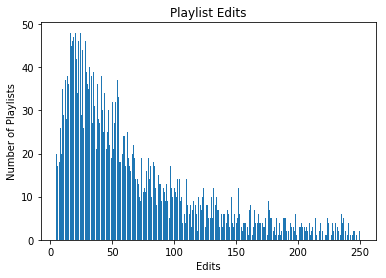

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(playlist_nr_tracks, height=playlist_nr_nr_tracks)
plt.title('Playlist Edits')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')
plt.show()

## Playlist Edits (checking collaboration)

In [24]:
playlist_dist_collab_on = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["collaborative"] == 'true':
            if playlist["num_edits"] not in playlist_dist_collab_on:
                playlist_dist_collab_on[playlist["num_edits"]] = 1
            else:
                playlist_dist_collab_on[playlist["num_edits"]] += 1

In [25]:
playlist_dist_collab_off = dict()
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        if playlist["collaborative"] == 'false':
            if playlist["num_edits"] not in playlist_dist_collab_off:
                playlist_dist_collab_off[playlist["num_edits"]] = 1
            else:
                playlist_dist_collab_off[playlist["num_edits"]] += 1

In [26]:
playlist_tuples = list(playlist_dist_collab_on.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_on=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_on=[t[1] for t in playlist_tuples]

In [27]:
playlist_tuples = list(playlist_dist_collab_off.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_off=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_off=[t[1] for t in playlist_tuples]

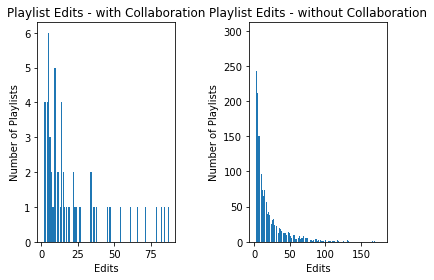

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,2,1)
ax.bar(playlist_nr_edits_on, height=playlist_nr_nr_edits_on)
plt.title('Playlist Edits - with Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

ax = fig.add_subplot(1,2,2)
ax.bar(playlist_nr_edits_off, height=playlist_nr_nr_edits_off)
plt.title('Playlist Edits - without Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

plt.tight_layout()
plt.show()

## Duration of Playlists

In [29]:
playlist_len_ms = []
for playlistSet in playlistData:
    for playlist in playlistSet["playlists"]:
        playlist_len_ms.append(playlist['duration_ms'])

In [30]:
playlist_len_ms.sort()

In [31]:
playlist_len_ms
playlist_len_mins = [(x / 100)/60 for x in playlist_len_ms] # in mins

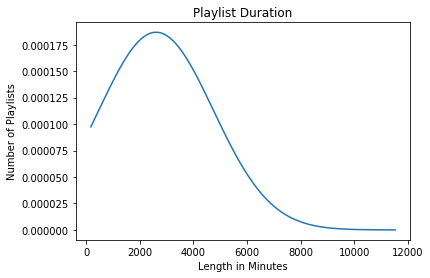

In [32]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

hmean = np.mean(playlist_len_mins)
hstd = np.std(playlist_len_mins)
pdf = stats.norm.pdf(playlist_len_mins, hmean, hstd)
plt.title('Playlist Duration')
plt.xlabel('Length in Minutes')
plt.ylabel('Number of Playlists')

plt.plot(playlist_len_mins, pdf) # including h here is crucial